In [30]:
import gtfparse, os, pandas as pd
import numpy as np
from pathlib import Path
from copy import deepcopy


savingdir = os.getcwd()
# refseq_file = os.path.join('/home/xli/reference/human/hg38/gencode.v41.annotation.gtf')
# refseq_df = gtfparse.read_gtf(refseq_file)


annot_file = os.path.join('/home/xli/reference/human/hg38/gencode.v41.annotation.gtf')
annot_df = gtfparse.read_gtf(annot_file)

# print(refseq_df['feature'].unique())
annot_df.head()
refseq_df = pd.DataFrame(data=annot_df, columns=annot_df.columns)

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'hgnc_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


In [32]:
refseq_df = pd.DataFrame(data=annot_df, columns=annot_df.columns)
refseq_df

,seqname,source,feature,start,end,score,strand,frame,gene_id,gene_type,...,transcript_name,transcript_support_level,tag,havana_transcript,exon_number,exon_id,ont,protein_id,ccdsid,artif_dupl
0,chr1,HAVANA,gene,11869,14409,NaN,+,0,ENSG00000223972.5,transcribed_unprocessed_pseudogene,...,,,,,,,,,,
1,chr1,HAVANA,transcript,11869,14409,NaN,+,0,ENSG00000223972.5,transcribed_unprocessed_pseudogene,...,DDX11L1-202,1,basic,OTTHUMT00000362751.1,,,,,,
2,chr1,HAVANA,exon,11869,12227,NaN,+,0,ENSG00000223972.5,transcribed_unprocessed_pseudogene,...,DDX11L1-202,1,basic,OTTHUMT00000362751.1,1,ENSE00002234944.1,,,,
3,chr1,HAVANA,exon,12613,12721,NaN,+,0,ENSG00000223972.5,transcribed_unprocessed_pseudogene,...,DDX11L1-202,1,basic,OTTHUMT00000362751.1,2,ENSE00003582793.1,,,,
4,chr1,HAVANA,exon,13221,14409,NaN,+,0,ENSG00000223972.5,transcribed_unprocessed_pseudogene,...,DDX11L1-202,1,basic,OTTHUMT00000362751.1,3,ENSE00002312635.1,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375754,chrM,ENSEMBL,transcript,15888,15953,NaN,+,0,ENSG00000210195.2,Mt_tRNA,...,MT-TT-201,NA,"basic,Ensembl_canonical",,,,,,,
3375755,chrM,ENSEMBL,exon,15888,15953,NaN,+,0,ENSG00000210195.2,Mt_tRNA,...,MT-TT-201,NA,"basic,Ensembl_canonical",,1,ENSE00001544475.2,,,,
3375756,chrM,ENSEMBL,gene,15956,16023,NaN,-,0,ENSG00000210196.2,Mt_tRNA,...,,,,,,,,,,
3375757,chrM,ENSEMBL,transcript,15956,16023,NaN,-,0,ENSG00000210196.2,Mt_tRNA,...,MT-TP-201,NA,"basic,Ensembl_canonical",,,,,,,


In [33]:
chrms = ['chr{}'.format(n) for n in [*np.arange(1, 23), 'X', 'Y', 'M']]
print(chrms)

['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM']


In [34]:
# keeping only exons (which include UTRs) filter the predicted genes
refseq_df = refseq_df.loc[(refseq_df['feature'] == 'exon')]
refseq_df.sample(10)

,seqname,source,feature,start,end,score,strand,frame,gene_id,gene_type,...,transcript_name,transcript_support_level,tag,havana_transcript,exon_number,exon_id,ont,protein_id,ccdsid,artif_dupl
3164519,chr21,HAVANA,exon,40083908,40084006,NaN,-,0,ENSG00000171587.15,protein_coding,...,DSCAM-202,1,"mRNA_start_NF,cds_start_NF,exp_conf",OTTHUMT00000195030.1,20,ENSE00001175244.1,,ENSP00000385342.2,,
2256742,chr14,HAVANA,exon,31453275,31453344,NaN,-,0,ENSG00000203546.7,protein_coding,...,ENST00000547760,3,"non_canonical_TEC,mRNA_start_NF,cds_start_NF",OTTHUMT00000409472.1,2,ENSE00003586381.1,,ENSP00000449799.1,,
3007899,chr19,HAVANA,exon,44653900,44654017,NaN,+,0,ENSG00000073008.15,protein_coding,...,PVR-203,2,"basic,appris_alternative_2,CCDS",OTTHUMT00000323020.2,4,ENSE00003603474.1,,ENSP00000385344.3,CCDS46105.1,
2583671,chr16,HAVANA,exon,69109396,69110031,NaN,+,0,ENSG00000103044.11,protein_coding,...,HAS3-201,1,"basic,CCDS",OTTHUMT00000268899.1,2,ENSE00001785957.1,,ENSP00000219322.3,CCDS10870.1,
1237701,chr6,HAVANA,exon,167376971,167378092,NaN,-,0,ENSG00000203690.13,transcribed_unprocessed_pseudogene,...,TCP10L3-214,,RNA_Seq_supported_only,,1,ENSE00002458671.2,,,,
2590302,chr16,HAVANA,exon,70802084,70808062,NaN,-,0,ENSG00000157423.18,protein_coding,...,HYDIN-206,5,"not_organism_supported,basic,Ensembl_canonical...",OTTHUMT00000398624.4,86,ENSE00001313157.5,,ENSP00000377197.2,CCDS59269.1,
2662838,chr17,HAVANA,exon,16382568,16382669,NaN,-,0,ENSG00000265401.1,lncRNA,...,ENST00000583934,5,"basic,Ensembl_canonical",OTTHUMT00000445889.1,1,ENSE00002725249.1,,,,
40263,chr1,HAVANA,exon,20829147,20829272,NaN,-,0,ENSG00000075151.24,protein_coding,...,EIF4G3-215,,"mRNA_start_NF,cds_start_NF,RNA_Seq_supported_only",,28,ENSE00003496902.1,,ENSP00000504941.1,,
1469472,chr8,HAVANA,exon,85110115,85110180,NaN,+,0,ENSG00000133739.16,protein_coding,...,LRRCC1-203,1,,OTTHUMT00000380270.1,2,ENSE00003677444.1,,ENSP00000430960.1,,
2608536,chr16,HAVANA,exon,88035323,88035394,NaN,+,0,ENSG00000172530.22,protein_coding,...,BANP-228,,"basic,Ensembl_canonical,MANE_Select",,10,ENSE00002213839.1,,ENSP00000507916.1,,


## Get immunoglobulin genes from Gencode

In [4]:
# annot_df = annot_df.loc[annot_df['gene_type'].isin(['IG_C_gene', "IG_D_gene",
#                                                    "IG_J_gene", "IG_V_gene", 'TR_C_gene', 
#                                                    'TR_J_gene', 'TR_V_gene', 'TR_D_gene'])]
# annot_df = annot_df.loc[(annot_df['feature'] == 'exon')]

# annot_df.head()

,seqname,source,feature,start,end,score,strand,frame,gene_id,gene_type,...,transcript_name,transcript_support_level,tag,havana_transcript,exon_number,exon_id,ont,protein_id,ccdsid,artif_dupl
409795,chr2,HAVANA,exon,87338511,87338559,NaN,+,0,ENSG00000233999.3,IG_V_gene,...,IGKV3OR2-268-201,NA,"mRNA_end_NF,cds_end_NF,basic,Ensembl_canonical...",OTTHUMT00000330418.3,1,ENSE00003567656.1,,ENSP00000474297.1,,
409798,chr2,HAVANA,exon,87338735,87339035,NaN,+,0,ENSG00000233999.3,IG_V_gene,...,IGKV3OR2-268-201,NA,"mRNA_end_NF,cds_end_NF,basic,Ensembl_canonical...",OTTHUMT00000330418.3,2,ENSE00003560657.1,,ENSP00000474297.1,,
411003,chr2,HAVANA,exon,88857161,88857683,NaN,-,0,ENSG00000211592.8,IG_C_gene,...,IGKC-201,NA,"mRNA_start_NF,cds_start_NF,basic,Ensembl_canon...",OTTHUMT00000323482.1,1,ENSE00001507664.2,,ENSP00000374777.2,,
411009,chr2,HAVANA,exon,88860568,88860605,NaN,-,0,ENSG00000211593.2,IG_J_gene,...,IGKJ5-201,NA,"mRNA_start_NF,mRNA_end_NF,cds_start_NF,cds_end...",OTTHUMT00000323474.3,1,ENSE00001507665.2,,ENSP00000420166.1,,
411013,chr2,HAVANA,exon,88860886,88860922,NaN,-,0,ENSG00000211594.2,IG_J_gene,...,IGKJ4-201,NA,"mRNA_start_NF,mRNA_end_NF,cds_start_NF,cds_end...",OTTHUMT00000323495.2,1,ENSE00002047359.1,,ENSP00000417097.1,,


In [5]:
# gen2refseq = pd.DataFrame(annot_df[['seqname', 'source', 'feature', 'start', 'end', 'score', 
#                            'strand', 'frame', 'gene_id', 'transcript_id', 'gene_name',
#                            'exon_number', 'exon_id']])
# gen2refseq.loc[:, 'gene_id'] = gen2refseq['gene_name'].to_numpy()
# display(gen2refseq)
# refseq_df = pd.concat([gen2refseq, refseq_df], ignore_index=True).sort_values(by=['seqname', 'start'], ignore_index=True)
# display(refseq_df)

,seqname,source,feature,start,end,score,strand,frame,gene_id,transcript_id,gene_name,exon_number,exon_id
409795,chr2,HAVANA,exon,87338511,87338559,NaN,+,0,IGKV3OR2-268,ENST00000421835.2,IGKV3OR2-268,1,ENSE00003567656.1
409798,chr2,HAVANA,exon,87338735,87339035,NaN,+,0,IGKV3OR2-268,ENST00000421835.2,IGKV3OR2-268,2,ENSE00003560657.1
411003,chr2,HAVANA,exon,88857161,88857683,NaN,-,0,IGKC,ENST00000390237.2,IGKC,1,ENSE00001507664.2
411009,chr2,HAVANA,exon,88860568,88860605,NaN,-,0,IGKJ5,ENST00000390238.2,IGKJ5,1,ENSE00001507665.2
411013,chr2,HAVANA,exon,88860886,88860922,NaN,-,0,IGKJ4,ENST00000390239.2,IGKJ4,1,ENSE00002047359.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193212,chr22,HAVANA,exon,22910574,22910606,NaN,+,0,IGLJ4,ENST00000390326.2,IGLJ4,1,ENSE00001507829.2
3193219,chr22,HAVANA,exon,22914237,22914308,NaN,+,0,IGLJ5,ENST00000390327.2,IGLJ5,1,ENSE00001507830.2
3193226,chr22,HAVANA,exon,22918132,22918201,NaN,+,0,IGLJ6,ENST00000390328.2,IGLJ6,1,ENSE00001507831.2
3193233,chr22,HAVANA,exon,22921390,22921435,NaN,+,0,IGLJ7,ENST00000390330.2,IGLJ7,1,ENSE00001507834.2


,seqname,source,feature,start,end,score,strand,frame,gene_id,transcript_id,gene_name,exon_number,exon_id
0,chr1,ncbiRefSeq,exon,11874,12227,NaN,+,0,DDX11L1,NR_046018.2,DDX11L1,1,NR_046018.2.1
1,chr1,ncbiRefSeq,exon,12613,12721,NaN,+,0,DDX11L1,NR_046018.2,DDX11L1,2,NR_046018.2.2
2,chr1,ncbiRefSeq,exon,13221,14409,NaN,+,0,DDX11L1,NR_046018.2,DDX11L1,3,NR_046018.2.3
3,chr1,ncbiRefSeq,exon,14362,14829,NaN,-,0,WASH7P,NR_024540.1,WASH7P,1,NR_024540.1.1
4,chr1,ncbiRefSeq,exon,14970,15038,NaN,-,0,WASH7P,NR_024540.1,WASH7P,2,NR_024540.1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780871,chrY_KZ208924v1_fix,ncbiRefSeq,exon,5842,5933,NaN,-,0,TTTY13,NR_001537.1_2,TTTY13,2,NR_001537.1_2.2
780872,chrY_KZ208924v1_fix,ncbiRefSeq,exon,8560,8721,NaN,-,0,TTTY13,NR_001537.1_2,TTTY13,3,NR_001537.1_2.3
780873,chrY_KZ208924v1_fix,ncbiRefSeq,exon,10331,10429,NaN,-,0,TTTY13,NR_001537.1_2,TTTY13,4,NR_001537.1_2.4
780874,chrY_KZ208924v1_fix,ncbiRefSeq,exon,11025,11186,NaN,-,0,TTTY13,NR_001537.1_2,TTTY13,5,NR_001537.1_2.5


## Making target files for the constitutive exons per chromosome

In [35]:
def findConstitutiveExons2(exonStarts, exonEnds, cutoff = 0.75):
    """
        finding the constitutive exons from the multiple isoforms of a gene
        exonStarts: array containing the start coordinate of exons
        exonEnds: array containing the end coordinate of exons
    """
    geneStart = np.min(exonStarts)
    geneEnd = np.max(exonEnds)
    geneLen = geneEnd - geneStart + 1
    collapse = np.zeros(geneLen)

    for i, (start, end) in enumerate(zip(exonStarts, exonEnds)):
        collapse[(start - geneStart) : (end - geneStart + 1)] += 1

    n_iso = collapse.max()
    overlaps = np.where(collapse >= n_iso * cutoff)[0]

    noDirectionBounds = np.where((overlaps - np.append(overlaps[1:], overlaps[-1]+3)) < -1)[0]
    cExonStarts, cExonEnds = [], []
    for i, bound in enumerate(noDirectionBounds):
        if i == 0:
            cExonStarts.append(geneStart + overlaps[0])
        else:
            cExonStarts.append(geneStart + overlaps[noDirectionBounds[i-1] + 1])

        cExonEnds.append(geneStart + overlaps[bound])
    return cExonStarts , cExonEnds

In [7]:
# ref_chr = refseq_df.loc[refseq_df['seqname'].str.split('_').str[0] == ('chr1')]

# ref_chr[['seqname', 'gene_name']].groupby(by = ['seqname', 'gene_name']).size().reset_index().head()

In [41]:
for i, (chrmp, gene, _) in genes_chr.iterrows():
    print(chrmp, gene)

chr1 5S_rRNA
chr1 7SK
chr1 A3GALT2
chr1 AADACL3
chr1 AADACL4
chr1 ABCA4
chr1 ABCB10
chr1 ABCD3
chr1 ABHD17AP1
chr1 ABHD17AP3
chr1 ABL2
chr1 ACADM
chr1 ACAP3
chr1 ACBD3
chr1 ACBD3-AS1
chr1 ACBD6
chr1 ACKR1
chr1 ACOT11
chr1 ACOT7
chr1 ACP6
chr1 ACTA1
chr1 ACTBP11
chr1 ACTBP12
chr1 ACTG1P20
chr1 ACTG1P21
chr1 ACTG1P25
chr1 ACTG1P4
chr1 ACTL8
chr1 ACTN2
chr1 ACTN4P2
chr1 ACTRT2
chr1 ADAM15
chr1 ADAM30
chr1 ADAMTS4
chr1 ADAMTSL4
chr1 ADAMTSL4-AS1
chr1 ADAMTSL4-AS2
chr1 ADAR
chr1 ADCY10
chr1 ADGRB2
chr1 ADGRL2
chr1 ADGRL4
chr1 ADH5P2
chr1 ADH5P3
chr1 ADIPOR1
chr1 ADORA1
chr1 ADORA2BP1
chr1 ADORA3
chr1 ADPRS
chr1 ADSS2
chr1 AGBL4
chr1 AGBL4-AS1
chr1 AGBL4-IT1
chr1 AGL
chr1 AGMAT
chr1 AGO1
chr1 AGO3
chr1 AGO4
chr1 AGRN
chr1 AGT
chr1 AGTRAP
chr1 AHCTF1
chr1 AHCYL1
chr1 AHCYP8
chr1 AHDC1
chr1 AIDA
chr1 AIM2
chr1 AIMP1P2
chr1 AJAP1
chr1 AK2
chr1 AK4
chr1 AK5
chr1 AKIRIN1
chr1 AKNAD1
chr1 AKR1A1
chr1 AKR1B1P1
chr1 AKR1D1P1
chr1 AKR7A2
chr1 AKR7A2P1
chr1 AKR7A3
chr1 AKR7L
chr1 AKT3
chr1 AKT3-IT1
ch

#### Matt's version of ppDesigner gives probes within an exon range expanded by flankingLen. So I need to shrink each exon from both sides by flankingLen so that I get probes within the exon 


In [42]:
flankingLen = 0 
# iterate over chromosomes
for chrm in chrms:
    print("Preparing targets for {}".format(chrm))
    ppd_targets_chr = []
    ref_chr = refseq_df.loc[refseq_df['seqname'].str.split('_').str[0] == (chrm)]
        
    """Because some genes can be located on the chromosome patches 
        (e.g. chr1_KZ208906v1_fix), we have to iterate over chromosome patch-gene pairs"""
    genes_chr = ref_chr.groupby(by = ['seqname', 'gene_name']).size().reset_index()
    
    # iterate over chromosome-gene pairs in the chromosome 
    for i, (chrmp, gene, _) in genes_chr.iterrows():
        ref_gene = ref_chr.loc[(ref_chr['seqname'] == chrmp) & (ref_chr['gene_name'] == gene)]

        # find the constitutive exons from the isoforms of the gene
        cExonStarts, cExonEnds = findConstitutiveExons2(ref_gene['start'], ref_gene['end'], cutoff = 1/3)

        
        # Shrinking the exons by flankingLen from both sides and remove those
        cExonStarts, cExonEnds = np.array(cExonStarts), np.array(cExonEnds)
        cExonStarts += flankingLen
        cExonEnds -= flankingLen
        tooSmalls = cExonEnds <= cExonStarts
        cExonStarts = cExonStarts[~tooSmalls]
        cExonEnds = cExonEnds[~tooSmalls]
        
        # rearraging the exons for ppDesigner
        n_exon = len(cExonStarts)
        if n_exon > 0:
            gene_ppd = {'gene_name' : n_exon * [gene], 
                        'seqname' : n_exon * [chrmp],
                        'start' : cExonStarts,
                        'end' : cExonEnds,
                        'strand' : n_exon * [ref_gene['strand'].iloc[0]]}
            gene_ppd = pd.DataFrame(gene_ppd)
            gene_ppd['gene_name'] = gene_ppd['gene_name'] + '_' + gene_ppd['seqname'] + '_' + np.arange(1, n_exon + 1).astype(str)
            ppd_targets_chr.append(gene_ppd)
#         if i> 3:
#             break
        if i % 100 == 0:
            print(i)
    ppd_targets_chr = pd.concat(ppd_targets_chr, ignore_index=True)
    
    # saving the targets per chromosome in designated folder
    if not os.path.isdir(os.path.join(savingdir, chrm)):
        os.mkdir(os.path.join(savingdir, chrm))
    ppd_targets_chr.to_csv(os.path.join(savingdir, chrm, '{}.target'.format(chrm)), 
                           sep = '\t', header = False, index = False)
    if os.path.exists(os.path.join(savingdir, chrm, 'ppd_targets_{}.txt'.format(chrm))):
        os.remove(os.path.join(savingdir, chrm, 'ppd_targets_{}.txt'.format(chrm)))
#   
#     break
# ref_chr
# ref_gene

Preparing targets for chr1
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
Preparing targets for chr2
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
Preparing targets for chr3
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
Preparing targets for chr4
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
Preparing targets for chr5
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600


[150119467, 150120012, 150120888, 150121204, 150121880, 150124250, 150124727, 150125445, 150133695, 150133881, 150134750, 150135555, 150137008, 150155397]
[150119566, 150120123, 150121010, 150121322, 150122040, 150124360, 150124831, 150125520, 150133760, 150134008, 150135016, 150135878, 150137053, 150155859]


Text(0, 0.5, '#Exon Overlap')

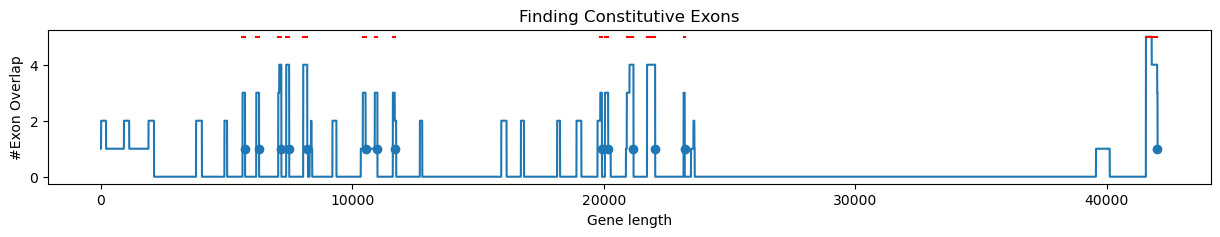

In [43]:
""" Visualization"""
exonStarts = refseq_df.loc[refseq_df['gene_name'] == 'PDGFRB']['start']
exonEnds = refseq_df.loc[refseq_df['gene_name'] == 'PDGFRB']['end']
# exonStarts = refseq_df.loc[refseq_df['gene_id'] == 'TRIM17']['start']
# exonEnds = refseq_df.loc[refseq_df['gene_id'] == 'TRIM17']['end']

cutoff = 0.5

geneStart = np.min(exonStarts)
geneEnd = np.max(exonEnds)
geneLen = geneEnd - geneStart + 1
collapse = np.zeros(geneLen)

for i, (start, end) in enumerate(zip(exonStarts, exonEnds)):
    collapse[(start - geneStart) : (end - geneStart + 1)] += 1

n_iso = collapse.max()
overlaps = np.where(collapse >= n_iso * cutoff)[0]

noDirectionBounds = np.where((overlaps - np.append(overlaps[1:], overlaps[-1]+3)) < -1)[0]
cExonStarts, cExonEnds = [], []
for i, bound in enumerate(noDirectionBounds):
    if i == 0:
        cExonStarts.append(geneStart + overlaps[0])
    else:
        cExonStarts.append(geneStart + overlaps[noDirectionBounds[i-1] + 1])

    cExonEnds.append(geneStart + overlaps[bound])

print(cExonStarts)
print(cExonEnds)

from matplotlib import pyplot as plt
plt.figure(figsize = (15, 2))
plt.plot(collapse)
for x1, x2 in zip(cExonStarts, cExonEnds):
    plt.plot([x1-geneStart , x2-geneStart], [n_iso, n_iso], 'r')
plt.scatter(overlaps[noDirectionBounds], len(noDirectionBounds) * [1])
plt.title('Finding Constitutive Exons')
plt.xlabel('Gene length')
plt.ylabel('#Exon Overlap')

## Creating the jobfiles within the directory for each chromosome, making one .sh file to run ppDesigner and run that file from the command line
Parameters that are set manually: max overlap of 20 bases between probes. Large exon size of 150. Max target region 40. 

What needs to be run from the command line:

(base) kian@genome-voyager:~/Codes/DART-FISH/ProbeProduction/221010_WholeGenome_overlappingProbes$ ./ppDesignerCommands.sh

In [10]:
import subprocess as sp
from time import time 
import os
import stat


def getJobFile(targetFile, ppd_dir):   
    jobFile = """#!/usr/bin/perl -w
#Use probe script with this file as ARGV[0].

our $softwareDir='{1}';
our $HsDir='/media/Scratch_SSD_Voyager/Kian/genomes/hg38/byChr/';

our $exon_info_file='{0}';

our $primerMaxLen=22;
our $primerMinLen=17;
our $H1_plus_H2_Len = 39; # sum of arm lengths-1

our $primerMaxTm = 65;
our $primerMinTm = 55;

our $flankingLen = 0; # 221006: from 25 to 0;

our $largeExonSize = 150;		# 210128 Kian: changed from 500 to 150

our $targetMinLen=1;
our $targetMaxLen=1;

our $arewebisulfite=0;
our $using_unafold=1;

our $jumpFromPrevious=0; # for targets>$largeExonSize, if a probe is found in a chunk, where should should the next chunk start from. 0 corresponds to the ligation junction of the previous probe
our $jumpIf0Found=$primerMaxLen; # if a probe is not found in a chunk, how much to move the next chunk forward.
our $maxOverlap=20; # maximum number of bases that can overlap between a probe pair


our $NNParamFile = "$softwareDir/NN_param.txt"; # path to NN_param.txt


#DO NOT CHANGE THE BELOW LINES.
eval `cat $softwareDir/probe_parameters.pl` or die 'couldnt parse file';
eval `cat $softwareDir/load_inputs.pl` or die 'couldnt parse file';
eval `cat $softwareDir/get_sequence.pl` or die 'couldnt parse file';
eval `cat $softwareDir/get_probes.pl` or die 'couldnt parse file';
eval `cat $softwareDir/neural_net.pl` or die 'couldnt parse file';
eval `cat $softwareDir/output_text.pl` or die 'couldnt parse file';
""".format(targetFile, ppd_dir)
    return jobFile

def writeJobFile(jfile, addr):
    with open(addr, 'w') as writer:
        writer.writelines(jfile)

def run_ppDesigner(command, outfile):
    print(outfile)
    with open(outfile, 'w') as outer: 
        ppd_proc = sp.Popen(command, stdout = sp.PIPE)
        commandOut = ppd_proc.communicate()
    return commandOut

def makeExecutable(file):
    st = os.stat(file)
    os.chmod(file, st.st_mode | stat.S_IEXEC)
       
ppDesignerPath = os.path.join(os.getcwd(), 'opt/ppDesigner/src/ppDesigner.pl')
for chrm in chrms:
    jfile = getJobFile(os.path.join(savingdir, chrm, '{}.target'.format(chrm)), os.path.dirname(ppDesignerPath))
    writeJobFile(jfile, os.path.join(savingdir, chrm, '{}.jfile'.format(chrm)))


# with open(os.path.join(savingdir, 'ppDesignerCommands.sh'), 'w') as ppdc:
#     ppdc.writelines("""#!/bin/bash

# for indx in 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 X Y
# do
#     cd chr$indx
#     {1} chr${{indx}}_largeExon{0}.jfile > chr${{indx}}_largeExon{0}.ppd &
#     cd ..
# done

# """.format(largeExon, ppDesignerPath))    

with open(os.path.join(savingdir, 'ppDesignerCommands.sh'), 'w') as ppdc:
    ppdc.writelines("""#!/bin/bash

chrlist='1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 X Y M'
runPPD () {{
    local indx=$1
    cd chr$indx
    {0} chr${{indx}}.jfile > chr${{indx}}.ppd
    cd ..
}}
    
for indx in $chrlist; do runPPD "$indx" & done

""".format(ppDesignerPath))    


    
makeExecutable('ppDesignerCommands.sh')
makeExecutable(ppDesignerPath)

## Making zero-gap probes
Since the current version of ppDesigner doesn't produce 0-gap probes, Matt had a file (ConvertToZeroGapProbe.pl) to read ppDesigner's output and add a base to the arm with lower Tm. Here, I make that file again and change it write an executable to run it for each chromosome. 

In [11]:
ConvertToZeroGapProbe = """#!/usr/bin/perl
 use strict;
 use warnings;
 
#print "Go from 1 gap to 0 gap\\nAdds target base to arm with lowest Tm\\nRemove any probes targeting softmasked regions (lowercase)";
my $onegap_filename = $ARGV[0];
open(DAT, $onegap_filename) || die("Error opening 1gap probe file");

while(<DAT>)
{
	my @line = split('\\t',$_);
	if ($#line > 3)
	{
        my $donorLoc = 0;
        my $midbaseStart = $line[3];
		my $leftArm = $line[5];
		my $leftTm = $line[6];
		my $rightArm = $line[7];
		my $rightTm = $line[8];
		my $annealRegion = $line[11];
		
		if ($leftTm <= $rightTm) #if leftTm is less than or equal to rightTm
		{
			$leftArm = $leftArm . substr($annealRegion,length($leftArm),1); #add base to left arm
            $donorLoc = $midbaseStart + 1;
		}
		else #else if rightTm is greater than leftTm
		{
			$rightArm = substr($annealRegion,length($leftArm),1) . $rightArm; #add base to right arm
            $donorLoc = $midbaseStart;
		}
			
		my $newLine = $line[0];
		for (my $n = 1;$n<$#line;$n++) 
		{
            if ($n == 3){
                $newLine = $newLine."\\t".$donorLoc;
            }
            elsif ($n == 4){
                $newLine = $newLine."\\t".$donorLoc;
            }
			elsif ($n == 5)
			{
				$newLine = $newLine."\\t".$leftArm;
			}
			elsif ($n == 7)
			{
				$newLine = $newLine ."\\t".$rightArm;
			}
			else
			{
				$newLine = $newLine."\\t".$line[$n];
			}
		}
		
		if($line[11] eq uc $line[11]) #if all uppercase
		{
			print $newLine."\\n";	
		}
	}




}
close(DAT);

"""

with open(os.path.join(savingdir, 'ConvertToZeroGapProbe.pl'), 'w') as writer:
    writer.writelines(ConvertToZeroGapProbe)

    

### Write an executable for converting whole genome probes to 0-gap

Run this in the command line:
(base) kian@genome-voyager:~/Codes/DART-FISH/ProbeProduction/221010_WholeGenome_overlappingProbes$ ./execute0gapConverter.sh

In [12]:
import os
import stat

def makeExecutable(file):
    st = os.stat(file)
    os.chmod(file, st.st_mode | stat.S_IEXEC)
 
with open(os.path.join(savingdir, 'execute0gapConverter.sh'), 'w') as ppdc:
    ppdc.writelines("""#!/bin/bash

for indx in 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 X Y M
do
perl {0}/ConvertToZeroGapProbe.pl {0}/chr${{indx}}/chr${{indx}}.ppd > {0}/chr${{indx}}/chr${{indx}}_0gap.ppd &
wait
done
""".format(savingdir))
makeExecutable(os.path.join(savingdir, 'execute0gapConverter.sh'))

## Making Fasta files for alignment

In [13]:
for chrm in chrms:#[0:1]:
    ppd_0g = pd.read_csv(os.path.join(savingdir, chrm, '{0}_0gap.ppd'.format(chrm)), sep = '\t', header = None)
    with open(os.path.join(savingdir, chrm, 'allProbes_{0}.fa'.format(chrm)), 'w') as writer:
        for i, row in ppd_0g.iterrows():
            writer.write('>{0}_mid{1}\n'.format(row[0], row[3])) # write the name
            writer.write("{}\n".format(row[11]))
#             if i > 20:
#                 break

In [14]:
ppd_0g.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,ND1_chrM_1,chrM:000003307-4262,0,19,19,ACCCATGGCCAACCTCCT,64,ACTCCTCATTGTACCCATTCTA,57,2.560457,W,ACCCATGGCCAACCTCCTACTCCTCATTGTACCCATTCTA,0.2
1,ND1_chrM_1,chrM:000003307-4262,0,59,59,ATCGCAATGGCATTCCTA,57,ATGCTTACCGAACGAAAAATTC,58,2.533262,W,ATCGCAATGGCATTCCTAATGCTTACCGAACGAAAAATTC,0.2
2,ND1_chrM_1,chrM:000003307-4262,0,87,87,CGAACGAAAAATTCTAGGCT,57,ATATACAACTACGCAAAGGC,55,2.523006,W,CGAACGAAAAATTCTAGGCTATATACAACTACGCAAAGGC,0.2
3,ND1_chrM_1,chrM:000003307-4262,0,126,126,CCCAACGTTGTAGGCCCCT,63,ACGGGCTACTACAACCCTTCG,64,2.550944,W,CCCAACGTTGTAGGCCCCTACGGGCTACTACAACCCTTCG,0.2
4,ND1_chrM_1,chrM:000003307-4262,0,156,156,ACCCTTCGCTGACGCCA,64,TAAAACTCTTCACCAAAGAGCCC,62,2.630296,W,ACCCTTCGCTGACGCCATAAAACTCTTCACCAAAGAGCCC,0.2


## Running BWA-MEM
(base) kian@genome-voyager:~/Codes/DART-FISH/ProbeProduction/221010_WholeGenome_overlappingProbes$ ./runBWA.sh

In [15]:
runAligner = """#!/bin/bash

chrlist='1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 X Y M'
runBWA () {{
    local indx=$1
    cd chr$indx
    ~/packages/bwa_201123/bwa/bwa mem -k 8 -T 0 /media/Scratch_SSD_Voyager/Kian/genomes/hg38/NoAlt/hg38_noAlt.fa allProbes_chr${{indx}}.fa > bwamem_chr${{indx}}.sam 
    cd ..
}}
    
for indx in $chrlist; do runBWA "$indx" & done
wait
""".format()
with open(os.path.join(savingdir, 'runBWA.sh'), 'w') as writer:
    writer.writelines(runAligner)
makeExecutable(os.path.join(savingdir, 'runBWA.sh'))

## Removing non-unique alignments
Remove probes that have alignments with mapping quality (MAPQ) <= 30, or with secondary alignment (existence of XA tag), or with not-matching aligned chromosome.

Since the reference has all the alternate contigs removed, we don't have any worries about spurious entries with MAPQ==0

In [19]:
# from copy import deepcopy
# import re

# def getXAchr(xatag):
#     if pd.isna(xatag):
#         return []
#     pattern = r"([a-zA-Z0-9_-]+),([0-9-]+),([a-zA-Z0-9_-]+),([a-zA-Z0-9_-]+);"
#     matches = re.findall(pattern, xatag)
#     return [match[0] for match in matches]

# def handleNoAltSam(df, chrm):
#     """ A function to handle aligned probes whose gene isn't located on alt contigs"""
#     sam_out = deepcopy(df)
    
#     # Removing probes with non-unique alignment
#     badprobes1 = sam_out.loc[sam_out['MAPQ'].astype(int) <= 20 ] 
#     sam_out = sam_out.loc[sam_out['MAPQ'].astype(int) > 20] # removing probes with low mapping quality 
#     badprobes2 = sam_out.loc[~sam_out['XA'].isna()]
#     sam_out = sam_out.loc[sam_out['XA'].isna()] # removing probes with secondary alignment
#     badprobes3 = sam_out.loc[~sam_out['RNAME'].str.startswith(chrm)]
#     sam_out = sam_out.loc[sam_out['RNAME'].str.startswith(chrm)] # removing probe whose chromosome doesn't match
#     return sam_out, pd.concat([badprobes1, badprobes2, badprobes3], ignore_index = True)

# def handleAltSam(df, chrm):
#     """ A function to handle aligned probes whose gene IS located on alt contigs.
#         These probes will likely have secondary alignments to their alt locations"""
#     sam_out = deepcopy(df)
#     badprobes1 = sam_out.loc[~sam_out['RNAME'].str.startswith(chrm)]
#     sam_out = sam_out.loc[sam_out['RNAME'].str.startswith(chrm)] # removing probe whose chromosome doesn't match
#     XAchrms = sam_out['XA'].apply(getXAchr)
#     allAlignedChrms = XAchrms + sam_out['chr'].apply(lambda x : [x]) # the chromosome of the primary and all secondary alignments for each gene/probe
#     allAltChrms = sam_out['gene'].apply(lambda x: genesWithAlts[x]) # the all contigs (ref and alt) of each gene/probe

#     df_temp = pd.concat([allAlignedChrms, allAltChrms], axis = 1)
#     alignedIsAlt = df_temp.apply(lambda x : all([algn in x.iloc[1] for algn in x.iloc[0]]), 
#                                  axis = 1) # check to see if the aligned chrms are all in the contigs for each gene/probe
#     badprobes2 = sam_out.loc[~alignedIsAlt]
#     sam_out = sam_out.loc[alignedIsAlt]
#     return sam_out, pd.concat([badprobes1, badprobes2], ignore_index = True)


In [16]:
mapq_thresh = 40
samNames = "bwamem_{{0}}.sam".format() # formatted string that shows the name of the SAM files
badprobes, uniqueprobes = {}, {}
for chrm in chrms: # [14:15]
    sam_out = pd.read_csv(os.path.join(savingdir, chrm, samNames.format(chrm)), sep = '\t', names = ['QNAME', 'FLAG', 'RNAME', 'POS', 
                                           'MAPQ', 'CIGAR', 'RNEXT', 'PNEXT',
                                           'TLEN', 'SEQ', 'QUAL', 
                                          'NM', 'MD', 'AS', 'XS', 'XA'])
    
    sam_out = sam_out.loc[~sam_out['QNAME'].str.startswith('@')] # removing the headers
    sam_out = pd.concat([sam_out, 
                         sam_out['QNAME'].str.extract(r"(?P<gene>[0-9a-zA-Z-]+)_(?P<chr>\S+)_\d+_mid\d+")
                        ], axis = 1) # extract the gene and chromosome names

    # Removing probes with non-unique alignment
    badprobes1 = sam_out.loc[sam_out['MAPQ'].astype(int) <= mapq_thresh ] 
    unqprbs = sam_out.loc[sam_out['MAPQ'].astype(int) > mapq_thresh] # removing probes with low mapping quality 
    badprobes2 = unqprbs.loc[~sam_out['XA'].isna()]
    unqprbs = unqprbs.loc[sam_out['XA'].isna()] # removing probes with secondary alignment
    badprobes3 = unqprbs.loc[sam_out['RNAME'].str.split("_").str[0] != (sam_out['chr'])]
    unqprbs =  unqprbs.loc[sam_out['RNAME'].str.split("_").str[0] == (sam_out['chr'])]# removing probe whose chromosome doesn't match

    badprobes[chrm] = pd.concat([badprobes1, badprobes2, badprobes3], ignore_index = True)
    uniqueprobes[chrm] = unqprbs  
    print("{3}: Removed {0} probes out of {1} ({2:.2f}%)".format(badprobes[chrm].shape[0],
                                                                badprobes[chrm].shape[0] + sam_out.shape[0],
                                                                100*badprobes[chrm].shape[0] / (badprobes[chrm].shape[0] + sam_out.shape[0]),
                                                                chrm))
    
display(uniqueprobes['chr1'].head(10))
display(badprobes['chr1'].head(10))

/media/Home_Raid1_Voyager/kian/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (1,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


chr1: Removed 21824 probes out of 199536 (10.94%)
chr2: Removed 10535 probes out of 128387 (8.21%)
chr3: Removed 9236 probes out of 111770 (8.26%)
chr4: Removed 4789 probes out of 67072 (7.14%)
chr5: Removed 7906 probes out of 88687 (8.91%)
chr6: Removed 68610 probes out of 216937 (31.63%)
chr7: Removed 12556 probes out of 94768 (13.25%)
chr8: Removed 6776 probes out of 67852 (9.99%)
chr9: Removed 8597 probes out of 77921 (11.03%)
chr10: Removed 7289 probes out of 77091 (9.46%)
chr11: Removed 9778 probes out of 108807 (8.99%)
chr12: Removed 7737 probes out of 98451 (7.86%)
chr13: Removed 2602 probes out of 35295 (7.37%)
chr14: Removed 6571 probes out of 65082 (10.10%)
chr15: Removed 15439 probes out of 84819 (18.20%)
chr16: Removed 10548 probes out of 82422 (12.80%)
chr17: Removed 19933 probes out of 127692 (15.61%)
chr18: Removed 2212 probes out of 31238 (7.08%)
chr19: Removed 31460 probes out of 144211 (21.82%)
chr20: Removed 2509 probes out of 47439 (5.29%)
chr21: Removed 3414 probe

,QNAME,FLAG,RNAME,POS,MAPQ,CIGAR,RNEXT,PNEXT,TLEN,SEQ,QUAL,NM,MD,AS,XS,XA,gene,chr
90,WASH7P_chr1_3_mid114,16,chr1,15891,60,39M,*,0.0,0.0,TCTAGCAGAGTGGCCAGCCACCGGAGGGGTCAACCACTT,*,NM:i:0,MD:Z:39,AS:i:39,XS:i:27,NaN,WASH7P,chr1
153,OR4F5_chr1_1_mid471,0,chr1,69546,60,40M,*,0.0,0.0,GTTGGCGTTTGCCGTGCACTTACTCTTCTGTGGTCCCAAT,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:20,NaN,OR4F5,chr1
286,LOC729737_chr1_1_mid4279,16,chr1,139030,60,40M,*,0.0,0.0,GGAGATGATGTCCTGGGACAGGAGTTGGCCGTGGAGAGGC,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:25,NaN,LOC729737,chr1
689,LOC100288069_chr1_7_mid303,16,chr1,778566,48,40M,*,0.0,0.0,CACTCTGATGAGAAAACTGCCCAGCTCCAGGCACCATGGC,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:32,NaN,LOC100288069,chr1
690,LOC100288069_chr1_7_mid321,16,chr1,778587,60,37M,*,0.0,0.0,CAGCTCCAGGCACCATGGCGCCCCAGTGATGTAGCCG,*,NM:i:0,MD:Z:37,AS:i:37,XS:i:17,NaN,LOC100288069,chr1
691,LOC100288069_chr1_7_mid343,16,chr1,778607,60,38M,*,0.0,0.0,CCCCAGTGATGTAGCCGAACACCCGCGCCTCTAACGTC,*,NM:i:0,MD:Z:38,AS:i:38,XS:i:27,NaN,LOC100288069,chr1
692,LOC100288069_chr1_7_mid364,16,chr1,778632,60,37M,*,0.0,0.0,CGCCTCTAACGTCGCCAACGGCCCACCTCTATGGTGT,*,NM:i:0,MD:Z:37,AS:i:37,XS:i:17,NaN,LOC100288069,chr1
707,FAM87B_chr1_1_mid511,0,chr1,817861,60,40M,*,0.0,0.0,ACTGTGACTAAGGCTCAGTCCCTGAGGACTGCCTTGGCAT,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:30,NaN,FAM87B,chr1
716,FAM87B_chr1_2_mid257,0,chr1,818960,60,40M,*,0.0,0.0,CACAGCATTAACTCTGGGAGTTGGGGACAGTGTGTATTCT,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:30,NaN,FAM87B,chr1
717,FAM87B_chr1_2_mid279,0,chr1,818982,60,40M,*,0.0,0.0,GGGGACAGTGTGTATTCTTCCTCCAGACACTCTCTGTTTC,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:18,NaN,FAM87B,chr1


,QNAME,FLAG,RNAME,POS,MAPQ,CIGAR,RNEXT,PNEXT,TLEN,SEQ,QUAL,NM,MD,AS,XS,XA,gene,chr
0,DDX11L1_chr1_1_mid18,0,chr1,182395,0,40M,*,0.0,0.0,TGCCGTCAGCCTTTTCTTTGACCTCTTCTTTCTGTTCATG,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:40,NaN,DDX11L1,chr1
1,DDX11L1_chr1_1_mid75,0,chr1,11929,0,40M,*,0.0,0.0,TCTTAGCCCAGACTTCCCGTGTCCTTTCCACCGGGCCTTT,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:40,NaN,DDX11L1,chr1
2,DDX11L1_chr1_1_mid93,16,chr15,101978978,0,40M,*,0.0,0.0,ATCAAGACCCTGTGACCTCTCAAAGGCCCGGTGGAAAGGA,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:40,NaN,DDX11L1,chr1
3,DDX11L1_chr1_1_mid125,16,chr15,101978948,0,40M,*,0.0,0.0,AGTCAGACACCTGCAGATGAAGACCACAGCATCAAGACCC,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:40,NaN,DDX11L1,chr1
4,DDX11L1_chr1_1_mid148,0,chr12,12132,0,40M,*,0.0,0.0,CATCTGCAGGTGTCTGACTTCCAGCAACTGCTGGCCTGTG,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:40,NaN,DDX11L1,chr1
5,DDX11L1_chr1_1_mid180,16,chrY,57214501,0,40M,*,0.0,0.0,GGAAAACTCCACTCCAGTGCTCAGCTTGCACCCTGGCACA,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:40,NaN,DDX11L1,chr1
6,DDX11L1_chr1_1_mid223,0,chr16,11760,0,40M,*,0.0,0.0,TGGAGAGGAGCCATGCCTAGAGTGGGATGGGCCATTGTTC,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:40,NaN,DDX11L1,chr1
7,DDX11L1_chr1_1_mid251,0,chr12,12236,0,40M,*,0.0,0.0,ATGGGCCATTGTTCATCTTCTGGCCCCTGTTGTCTGCATG,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:40,NaN,DDX11L1,chr1
8,DDX11L1_chr1_1_mid267,16,chr15,101978803,0,40M,*,0.0,0.0,CTGGTTGTGGTATTAAGTTACATGCAGACAACAGGGGCCA,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:40,NaN,DDX11L1,chr1
9,DDX11L1_chr1_1_mid299,16,chr15,101978773,0,40M,*,0.0,0.0,CTCATCTTTCCTCCAATCTTTCCCCTATGCCTGGTTGTGG,*,NM:i:0,MD:Z:40,AS:i:40,XS:i:40,NaN,DDX11L1,chr1


In [17]:
# extracting all info out of ppDesigner's output regarding the uniquely aligned probes
goodprobes = {}
for chrm in chrms:
    ppd_out = pd.read_csv(os.path.join(savingdir, chrm, '{0}_0gap.ppd'.format(chrm)),
                          sep = '\t', header = None)
    uniq_prbs = uniqueprobes[chrm]
    ppd_out['full_name'] = ["{0}_mid{1}".format(row[0], row[3]) for _, row in ppd_out.iterrows()]
    ppd_out = ppd_out.set_index('full_name')
    good_prbs = ppd_out.loc[uniq_prbs['QNAME']]
    goodprobes[chrm] = good_prbs

## Writing the output to file
Writing probes that didn't pass the filter as a SAM file with a "badprobes" suffix.

Writing probes that did pass the filters in ppDesigner output format with "filteredProbes" prefix.

In [18]:
# write the output to file
for chrm in chrms:
    badprobes[chrm].to_csv(os.path.join(savingdir, chrm, 
                                        'bwamem_{0}_badprobes.sam '.format(chrm)), sep = '\t', index=False)
    
    goodprobes[chrm].to_csv(os.path.join(savingdir, chrm, 
                                         'filteredProbes_{0}.ppd'.format(chrm)), sep = '\t', index = False)

# Combining probes from all chromosomes

In [19]:
import numpy as np, os, pandas as pd
savingdir = os.getcwd()

chrms = ['chr{}'.format(n) for n in [*np.arange(1, 23), 'X', 'Y']]

allprobes = []
for chrm in chrms:
    allprobes.append(pd.read_csv(os.path.join(savingdir, chrm, 
                                         'filteredProbes_{0}.ppd'.format(chrm)),
                                sep = '\t'))
allprobes = pd.concat(allprobes, ignore_index=True)
allprobes                     
                     

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,WASH7P_chr1_3,chr1:000015796-15947,0,114,114,AAGTGGTTGACCCCTCCGGT,64,GGCTGGCCACTCTGCTAGA,64,2.540034,C,AAGTGGTTGACCCCTCCGGTGGCTGGCCACTCTGCTAGA,1.3
1,OR4F5_chr1_1,chr1:000069091-70008,0,471,471,GTTGGCGTTTGCCGTGC,64,ACTTACTCTTCTGTGGTCCCAAT,60,2.550166,W,GTTGGCGTTTGCCGTGCACTTACTCTTCTGTGGTCCCAAT,0.2
2,LOC729737_chr1_1,chr1:000134773-139696,0,4279,4279,GCCTCTCCACGGCCAACT,63,CCTGTCCCAGGACATCATCTCC,64,2.548942,C,GCCTCTCCACGGCCAACTCCTGTCCCAGGACATCATCTCC,0.0
3,LOC100288069_chr1_7,chr1:000778284-778688,0,303,303,GCCATGGTGCCTGGAGC,64,TGGGCAGTTTTCTCATCAGAGTG,62,2.542456,C,GCCATGGTGCCTGGAGCTGGGCAGTTTTCTCATCAGAGTG,0.5
4,LOC100288069_chr1_7,chr1:000778284-778688,0,321,321,CGGCTACATCACTGGGGCG,63,CCATGGTGCCTGGAGCTG,63,1.239511,C,CGGCTACATCACTGGGGCGCCATGGTGCCTGGAGCTG,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529075,RBMY2FP_chrY_4,chrY:022314493-22316205,0,1429,1429,TTCAACAACACTCCACCA,57,TGTCTGAGAATGTGTGTATTCT,56,2.540504,W,TTCAACAACACTCCACCATGTCTGAGAATGTGTGTATTCT,0.1
1529076,LOC100652931_chrY_1,chrY:022316678-22316747,0,25,25,TCCTCCTCCTAAAAAGTCTGC,60,TCCTTCTGCTGTGGTAAGA,56,2.546745,W,TCCTCCTCCTAAAAAGTCTGCTCCTTCTGCTGTGGTAAGA,2.9
1529077,LOC100652931_chrY_1,chrY:022316678-22316747,0,40,40,TGCTCCTTCTGCTGTGGT,61,AAGAAGCAATAATTGGATGAGA,55,2.592248,W,TGCTCCTTCTGCTGTGGTAAGAAGCAATAATTGGATGAGA,2.9
1529078,LOC100652931_chrY_2,chrY:022318783-22318897,0,52,52,TCCTACACGTAGACGGCCA,63,ATCTCTTCCTGGAGAAATGAC,57,2.550421,W,TCCTACACGTAGACGGCCAATCTCTTCCTGGAGAAATGAC,1.7


## Removing probes with DpnII motif
removing all probes that have the DpnII motif in either of their arms

In [20]:
dpnii_pat = 'GATC'
probes_dpn2free = allprobes.loc[~(allprobes['5'].str.contains(dpnii_pat) | allprobes['7'].str.contains(dpnii_pat))]
print("{} probes were filtered due to DpnII motif filtering".format(allprobes.shape[0] - probes_dpn2free.shape[0]))
probes_dpn2free

132731 probes were filtered due to DpnII motif filtering


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,WASH7P_chr1_3,chr1:000015796-15947,0,114,114,AAGTGGTTGACCCCTCCGGT,64,GGCTGGCCACTCTGCTAGA,64,2.540034,C,AAGTGGTTGACCCCTCCGGTGGCTGGCCACTCTGCTAGA,1.3
1,OR4F5_chr1_1,chr1:000069091-70008,0,471,471,GTTGGCGTTTGCCGTGC,64,ACTTACTCTTCTGTGGTCCCAAT,60,2.550166,W,GTTGGCGTTTGCCGTGCACTTACTCTTCTGTGGTCCCAAT,0.2
2,LOC729737_chr1_1,chr1:000134773-139696,0,4279,4279,GCCTCTCCACGGCCAACT,63,CCTGTCCCAGGACATCATCTCC,64,2.548942,C,GCCTCTCCACGGCCAACTCCTGTCCCAGGACATCATCTCC,0.0
3,LOC100288069_chr1_7,chr1:000778284-778688,0,303,303,GCCATGGTGCCTGGAGC,64,TGGGCAGTTTTCTCATCAGAGTG,62,2.542456,C,GCCATGGTGCCTGGAGCTGGGCAGTTTTCTCATCAGAGTG,0.5
4,LOC100288069_chr1_7,chr1:000778284-778688,0,321,321,CGGCTACATCACTGGGGCG,63,CCATGGTGCCTGGAGCTG,63,1.239511,C,CGGCTACATCACTGGGGCGCCATGGTGCCTGGAGCTG,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529075,RBMY2FP_chrY_4,chrY:022314493-22316205,0,1429,1429,TTCAACAACACTCCACCA,57,TGTCTGAGAATGTGTGTATTCT,56,2.540504,W,TTCAACAACACTCCACCATGTCTGAGAATGTGTGTATTCT,0.1
1529076,LOC100652931_chrY_1,chrY:022316678-22316747,0,25,25,TCCTCCTCCTAAAAAGTCTGC,60,TCCTTCTGCTGTGGTAAGA,56,2.546745,W,TCCTCCTCCTAAAAAGTCTGCTCCTTCTGCTGTGGTAAGA,2.9
1529077,LOC100652931_chrY_1,chrY:022316678-22316747,0,40,40,TGCTCCTTCTGCTGTGGT,61,AAGAAGCAATAATTGGATGAGA,55,2.592248,W,TGCTCCTTCTGCTGTGGTAAGAAGCAATAATTGGATGAGA,2.9
1529078,LOC100652931_chrY_2,chrY:022318783-22318897,0,52,52,TCCTACACGTAGACGGCCA,63,ATCTCTTCCTGGAGAAATGAC,57,2.550421,W,TCCTACACGTAGACGGCCAATCTCTTCCTGGAGAAATGAC,1.7


## Save the final probe list in the .ppd format

In [21]:
probes_dpn2free.to_csv(os.path.join(savingdir, "probes_DpnII-filtered.ppd"), 
                      sep = '\t', index = False)

## Counting the number of probes per gene

In [22]:
all_probes = probes_dpn2free.copy()
all_probes['gene_name'] = all_probes['0'].str.split('_').str[0]
all_probes['chr'] = all_probes['1'].str.split(':').str[0].to_numpy()
gene_counts = all_probes.groupby(by = ['gene_name', 'chr']).size()
gene_counts.to_csv(os.path.join(savingdir, 'probe_counts_DpnII.tsv'), 
                   sep = '\t', header = ['probe_count'])
gene_counts

gene_name  chr  
A1BG       chr19     57
A1BG-AS1   chr19     44
A1CF       chr10    129
A2M        chr12    108
A2M-AS1    chr12     24
                   ... 
ZYG11A     chr1      88
ZYG11B     chr1     117
ZYX        chr7      43
ZZEF1      chr17    272
ZZZ3       chr1     105
Length: 26601, dtype: int64

## Make a bed file for the probes to visualize in UCSC Genome Browser
If using Matt's verion of ppDesigner, a correction of $flankingLen needs to be applied to the probe locations.

In [23]:
flankingLen = 0
all_probes = probes_dpn2free.copy()
all_probes['chr'] = all_probes['1'].str.split(':').str[0].to_numpy()
all_probes['gene_name'] = all_probes['0'].str.split('_').str[0]


exon_start = all_probes['1'].str.split(':').str[1].str.split('-').str[0].astype(int)
leftArmLen = all_probes['5'].str.len()
rightArmLen = all_probes['7'].str.len()

all_probes['probe_left'] = exon_start
all_probes['probe_right'] = exon_start
all_probes.loc[all_probes['10'] == 'W', 'probe_left'] += (all_probes['3'] - leftArmLen - flankingLen)
all_probes.loc[all_probes['10'] == 'C', 'probe_left'] += (all_probes['3']- rightArmLen - flankingLen)
all_probes.loc[all_probes['10'] == 'W', 'probe_right'] += (all_probes['3'] + rightArmLen - flankingLen - 1)
all_probes.loc[all_probes['10'] == 'C', 'probe_right'] += (all_probes['3'] + leftArmLen - flankingLen - 1)

probe_ranks = all_probes.groupby('gene_name').cumcount() + 1
all_probes['probe_name'] = all_probes['gene_name'] + '_' + probe_ranks.astype(str)
bed = pd.DataFrame({'chr' : all_probes['chr'], 'left' : all_probes['probe_left'].astype(int), 
                    'right' : all_probes['probe_right'].astype(int), 
                    'name' : all_probes['probe_name']}, index = None)
bed.to_csv(os.path.join(savingdir, 'probe_ranges_DpnII.bed'), 
           sep = '\t', index = False, 
           header = ['track', 'name=ppD_DF_DpnII_refseq_overlap20', 
                    "description='Probes designed by 221008 version of ppDesigner (max_overlap 20) using Refseq annotation. DpnII containing probes filtered.'", 
                    'useScore=0'])


In [29]:
### wrong code for generating bed files. Messes up for genes on the negative strand
# prb_left = exon_start + all_probes['3'].astype(int) - leftArmLen - flankingLen + 1
# prb_right= exon_start + all_probes['3'].astype(int) + rightArmLen - flankingLen + 1

# probe_ranks = all_probes.groupby('gene_name').cumcount() + 1
# all_probes['probe_name'] = all_probes['gene_name'] + '_' + probe_ranks.astype(str)
# bed = pd.DataFrame({'chr' : all_probes['chr'], 'leftArm' : prb_left, 'rightArm' : prb_right, 
#                   'name' : all_probes['probe_name']}, index = None)
# bed.to_csv(os.path.join(savingdir, 'probe_ranges_DpnII_largeExon{}_3.bed'.format(largeExon)), 
#            sep = '\t', index = False, 
#            header = ['track', 'name=MattPPD_DpnII_refseq_{}'.format(largeExon), 
#                     "description='Probes designed by Matts version of ppDesigner (largeExon {0}) using Refseq annotation. DpnII containing probes filtered.'".format(largeExon), 
#                     'useScore=0'])



### Miscellaneous codes, old codes, scratch codes

In [30]:
## Counting the number of probes per gene
# counts = []
# for chrm in chrms:
# #     counts[chrm] = {}
#     probes_chr = pd.read_csv(os.path.join(savingdir, chrm, 
#                                          'filteredProbes_{0}_largeExon{1}.ppd'.format(chrm, largeExon)), 
#                              sep = '\t')
#     probes_chr['gene_name'] = probes_chr['0'].str.split('_').str[0]
# #     counts[chrm] = probes_chr.groupby(by = ['gene_name']).size().to_dict()
#     gene_chr = probes_chr.groupby(by = ['gene_name']).size()
#     count_chr = pd.DataFrame({'chr' : gene_chr.shape[0] * [chrm],
#                               'probe_count' : gene_chr})
#     counts.append(count_chr) 
# counts = pd.concat(counts)
# counts.to_csv(os.path.join(savingdir, 'probe_counts_largeExon{}.tsv'.format(largeExon)), sep = '\t')
# counts.head()

    

In [ ]:
refseq_file = os.path.join('/media/Scratch_SSD_Voyager/Kian/genomes/hg38/hg38.ncbiRefSeq.gtf')
refseq_df = gtfparse.read_gtf(refseq_file)
refseq_df = refseq_df.loc[(refseq_df['feature'] == 'exon') & (refseq_df['transcript_id'].str.startswith('N'))]



In [ ]:
refseq_df.head()

In [ ]:
refseq_df.loc[refseq_df['gene_name'] == 'B2M'].reset_index(drop = True)

In [ ]:
pd.set_option("display.max_rows", 201)

In [ ]:
pd.get_option("display.max_rows")

In [ ]:
pd.get_option("display.min_rows")

In [ ]:
pd.set_option("display.min_rows", 30)

In [ ]:
# samNames = "bwamem_{{0}}_largeExon{0}.sam".format(largeExon) # formatted string that shows the name of the SAM files
# badprobes, uniqprobes = {}, {}
# for chrm in chrms:
#     sam_out = pd.read_csv(os.path.join(savingdir, chrm, samNames.format(chrm)), sep = '\t', names = ['QNAME', 'FLAG', 'RNAME', 'POS', 
#                                            'MAPQ', 'CIGAR', 'RNEXT', 'PNEXT',
#                                            'TLEN', 'SEQ', 'QUAL', 
#                                           'NM', 'MD', 'AS', 'XS', 'XA'])
    
#     # Removing probes with non-unique alignment
#     sam_out = sam_out.loc[~sam_out['QNAME'].str.startswith('@')] # removing the headers
#     badprobes1 = sam_out.loc[sam_out['MAPQ'].astype(int) <= 20 ] 
#     sam_out = sam_out.loc[sam_out['MAPQ'].astype(int) > 20] # removing probes with mapping quality of zero
#     badprobes2 = sam_out.loc[~sam_out['XA'].isna()]
#     sam_out = sam_out.loc[sam_out['XA'].isna()] # removing probes with secondary alignment
#     badprobes3 = sam_out.loc[~sam_out['RNAME'].str.startswith(chrm)]
#     sam_out = sam_out.loc[sam_out['RNAME'].str.startswith(chrm)] # removing probe whose chromosome doesn't match

#     badprobes[chrm] = pd.concat([badprobes1, badprobes2, badprobes3], ignore_index = True)
#     uniqprobes[chrm] = sam_out  
#     print("{3}: Removed {0} probes out of {1} ({2:.2f}%)".format(badprobes[chrm].shape[0],
#                                                                 badprobes[chrm].shape[0] + sam_out.shape[0],
#                                                                 100*badprobes[chrm].shape[0] / (badprobes[chrm].shape[0] + sam_out.shape[0]),
#                                                                 chrm))

In [ ]:
# print("Sam_out shape: {}".format(sam_out.shape))
# print("Alt_sam_out shape: {}".format(alt_sam_out.shape))
# print("norm_sam_out shape: {}".format(norm_sam_out.shape))
# print("bad_probes shape: {}".format(badprobes['chr15'].shape))
# print("alt_bad_probes shape: {}".format(alt_badprobes.shape))
# print("norm_bad_probes shape: {}".format(norm_badprobes.shape))